In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
X = [[3,12], [5,87], [9,13], [12,12]]

In [7]:
X[1]

[5, 87]

In [8]:
X = [[[1,2],[3,4]],[[5,6],[7,8]]]

In [9]:
X[0]

[[1, 2], [3, 4]]

In [10]:
n = 37688
X = x_train[n]

In [11]:
X.shape
#看資料狀態

(28, 28)

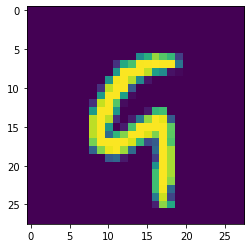

In [12]:
plt.imshow(X)

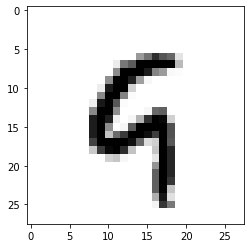

In [13]:
plt.imshow(X, cmap="Greys")

In [14]:
y_train[n]

9

normalization，數字變0到1之間

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[n]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from keras.utils import np_utils

In [18]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

讀相關套件

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [48]:
model = Sequential()

In [49]:
model.add(Flatten(input_shape = (28,28)))

In [50]:
model.add(Dense(20, activation = "relu"))

In [51]:
model.add(Dense(15, activation = "relu"))

In [52]:
model.add(Dense(10, activation = "relu"))

In [53]:
model.add(Dense(10, activation = "softmax"))

建好了！！！！

In [54]:
model.compile(loss= "mse", optimizer=SGD(lr = 1), metrics=['accuracy'])
#最後一個是指可以監控準確率

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_10 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
Total params: 16,285
Trainable params: 16,285
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0502 - acc: 0.6086
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0163 - acc: 0.8926
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0125 - acc: 0.9187
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0108 - acc: 0.9302
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0098 - acc: 0.9363
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0091 - acc: 0.9416
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0084 - acc: 0.9461
Epoch 8/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0079 - acc: 0.9494
Epoch 9/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0075 - acc: 0.9517
Epoch 10/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0072 - acc: 0.9538

In [30]:
from ipywidgets import interact_manual

In [57]:
predict = model.predict_classes(x_test)

In [58]:
predict[13]

0

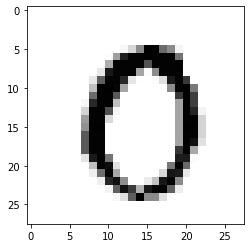

In [59]:
plt.imshow(x_test[13], cmap="Greys")

In [60]:
def test(testing_code):
    plt.imshow(x_test[testing_code], cmap="Greys")
    print("神經網路判斷為:" , predict[testing_code])

神經網路判斷為: 5


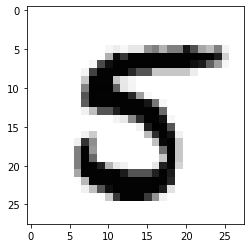

In [61]:
test(1598)

In [62]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/step


In [63]:
print('正確率', score[1])

正確率 0.9565


儲存！

In [64]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')